## Harry Jannerone Needs to Know What Plane to Sell

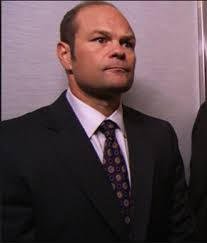

### Overview

This project analyzes the aviation accident data from the National Transportation Safety Board (NTSB) in order to determine which type of aircraft has the lowest risk.  Descriptive analysis of injury rates determines that specific aircraft have fewer people injured in accidents than others. 

### Business Problem

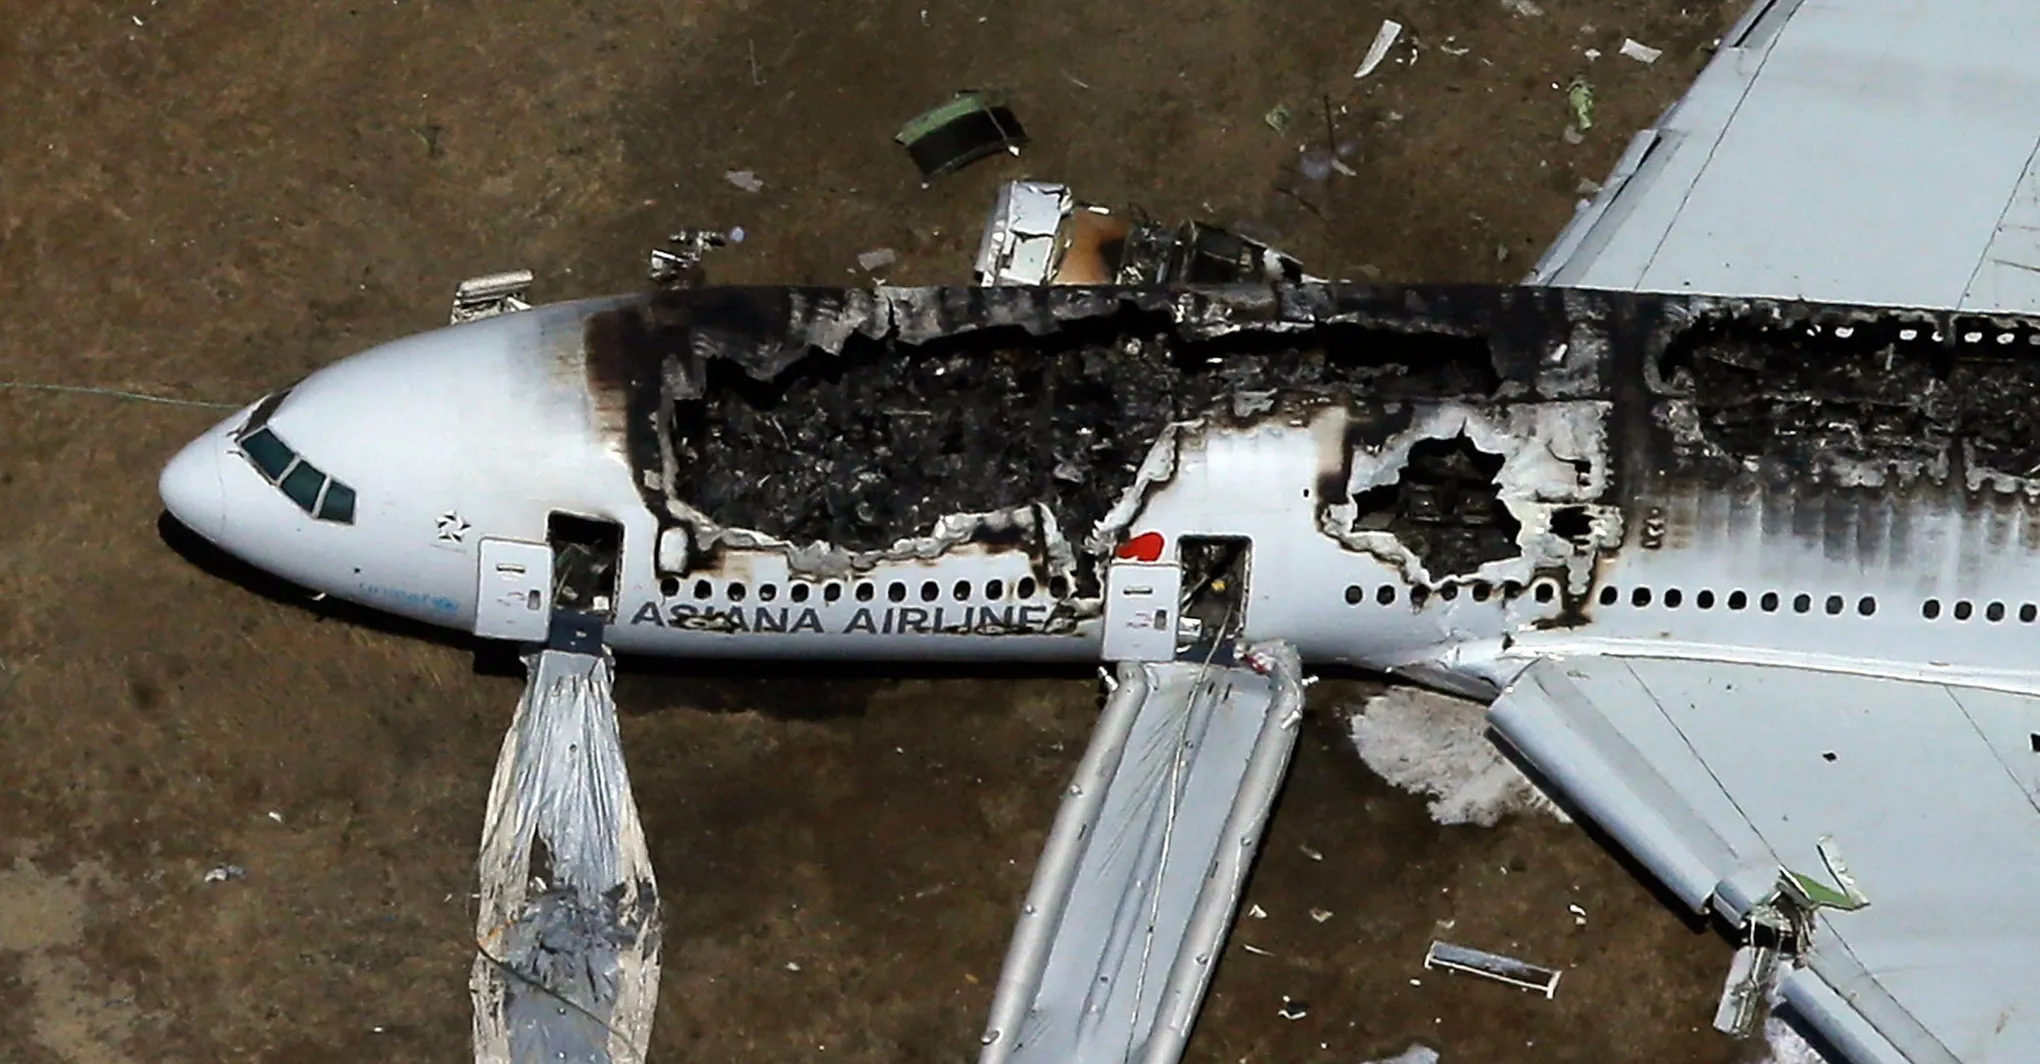

Harry Jannerone has just been laid off from Dunder Mifflin Paper Company and wants to accomplish his dream of selling one big thing, like an airplane and then retiring.  In order to do this he wants to know which aircraft has the lowest risk for his endeavor. Using the accident data from the NTSB, I describe patterns in number and types of injuries that occur in aircraft accidents to determine which aircraft will have the lowest risk and give Mr. Jannerone the best chance at success. 

### Data Understanding

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.  Every accent has a unique ID associated with it.  The data files proved the aircraft category, make, model, number of engines, engine type, and types of injuries.   

In [42]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

In [43]:
ad = pd.read_csv('Aviation_Data.csv', low_memory=False) 

In [44]:
ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [45]:
ad.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [46]:
ad['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [47]:
ad['Make'].value_counts()

Cessna                 22227
Piper                  12029
CESSNA                  4922
Beech                   4330
PIPER                   2841
                       ...  
Lardas                     1
FREDERICK HAYS-ROTH        1
SIERRA                     1
SKYTRAILS LSA              1
BURKHOLDER JIMMY C         1
Name: Make, Length: 8237, dtype: int64

In [48]:
ad['Model'].value_counts()

152                2367
172                1756
172N               1164
PA-28-140           932
150                 829
                   ... 
B-767                 1
AVRO  146             1
ME 209                1
JEANIE'S TEENIE       1
WACO T-10             1
Name: Model, Length: 12318, dtype: int64

In [49]:
ad['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [50]:
ad['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

### Data Preparation

#### Data Cleaning

I make the file easier to work with by dropping unnecessary columns and eliminating/replacing missing values. 

In [51]:
ad.drop(columns = ['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude', 
                  'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description', 
                  'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Longitude', 
                  'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'], inplace=True)

In [52]:
ad = ad.drop_duplicates()

In [53]:
ad.isna().sum()

Accident.Number               1
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56603
Make                         64
Model                        93
Amateur.Built               103
Number.of.Engines          6084
Engine.Type                7076
Total.Fatal.Injuries      11402
Total.Serious.Injuries    12511
Total.Minor.Injuries      11934
Total.Uninjured            5913
dtype: int64

I replaced all of the missing values from the injury columns with zeroes because if they were blank then that means nobody was injured with that category. 

In [54]:
ad['Total.Fatal.Injuries'] = ad['Total.Fatal.Injuries'].fillna(value=0).copy()
ad['Total.Serious.Injuries'] = ad['Total.Serious.Injuries'].fillna(value=0).copy()
ad['Total.Minor.Injuries'] = ad['Total.Minor.Injuries'].fillna(value=0).copy()
ad['Total.Uninjured'] = ad['Total.Uninjured'].fillna(value=0).copy()

In [55]:
ad = ad.dropna()

In [56]:
print('Sum of Missing Values in Each Column:  ', ad.isna().sum())
print('Shape of the dataset:  ', ad.shape)

Sum of Missing Values in Each Column:   Accident.Number           0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64
Shape of the dataset:   (25282, 13)


Mr. Jannerone specified that he wants to sell an airplane so I'm going to create a dataset with only airplanes. 

In [57]:
ad = ad[ad['Aircraft.Category']=='Airplane']

### Analysis

In [58]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#### Amateur vs. Professional

More than half of the people who are in an airplane accident in an airplane built by amateurs are injured versus only 19 percent of people in professionally-built airplanes. 

In [59]:
ad.groupby(['Amateur.Built']).sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Amateur.Built,,,,,
No,22028.0,6853.0,4617.0,3592.0,63731.0
Yes,2817.0,780.0,615.0,610.0,1856.0


In [60]:
### new dataset without amateur-built airplanes
adp = ad[ad['Amateur.Built']=='No']
adp.head()

,Accident.Number,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,NYC79AA106,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0
7,SEA82DA022,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0
8,NYC82DA015,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0
12,FTW82FRJ07,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0
13,FTW82FRA14,Fatal(1),Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0


#### Number of Injuries by Number of Engines

In [61]:
#number of injuries by number of engines in airplane
adp.groupby(['Number.of.Engines']).sum()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,1.0,0.0,0.0,4.0
1.0,4416.0,3539.0,2946.0,18911.0
2.0,2171.0,998.0,558.0,36344.0
3.0,4.0,24.0,80.0,4146.0
4.0,261.0,56.0,8.0,4326.0
8.0,0.0,0.0,0.0,0.0


Most accidents in the database occured in smaller 1 and 2 engine aircraft with fewer accidents occuring in 3 and 4 engine aircraft.  When there is an accident in a 3 or 4 engine aircraft most of the time the passengers are uninjured. 

<AxesSubplot:xlabel='Number.of.Engines'>

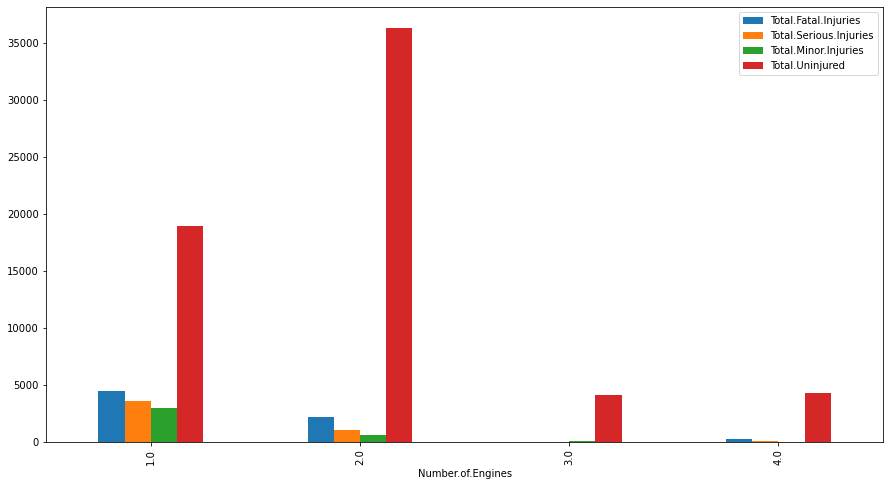

In [62]:
#remove 0 and 8 because of insufficient dat
adpj = adp[(adp['Number.of.Engines'] > 0.0) & (adp['Number.of.Engines'] < 8.0)]

#plot injuries based on number of engines
adpj.groupby(['Number.of.Engines']).sum().plot(kind="bar", figsize=(15,8) )


In [63]:
adne = adpj[(adpj['Number.of.Engines'] != 1.0)]
adne.head()

,Accident.Number,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,NYC79AA106,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0
8,NYC82DA015,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0
25,DCA82AA008,Fatal(8),Destroyed,Airplane,Cessna,414A,No,2.0,Reciprocating,8.0,0.0,0.0,0.0
26,ATL82FA033,Fatal(1),Destroyed,Airplane,Beechcraft,BE-58,No,2.0,Reciprocating,1.0,0.0,0.0,0.0
33,LAX82FA038,Fatal(2),Destroyed,Airplane,Piper,PA-34-200T,No,2.0,Reciprocating,2.0,0.0,0.0,0.0


#### Injuries by Engine Type

Accients that happen in airplanes with reciprocating engines have the most injuries. Therefore, I'm going to recommend Mr. Jannerone focus on airplanes that have turbo engines. 

In [64]:
adne.groupby(['Engine.Type']).sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,4.0,0.0,0.0,0.0,0.0
Geared Turbofan,2.0,0.0,0.0,0.0,121.0
Reciprocating,3086.0,1066.0,328.0,259.0,2110.0
Turbo Fan,1098.0,814.0,614.0,310.0,37005.0
Turbo Jet,181.0,57.0,31.0,9.0,3244.0
Turbo Prop,910.0,486.0,101.0,68.0,2325.0
Turbo Shaft,4.0,3.0,0.0,0.0,11.0
Unknown,6.0,10.0,4.0,0.0,0.0


<AxesSubplot:xlabel='Engine.Type'>

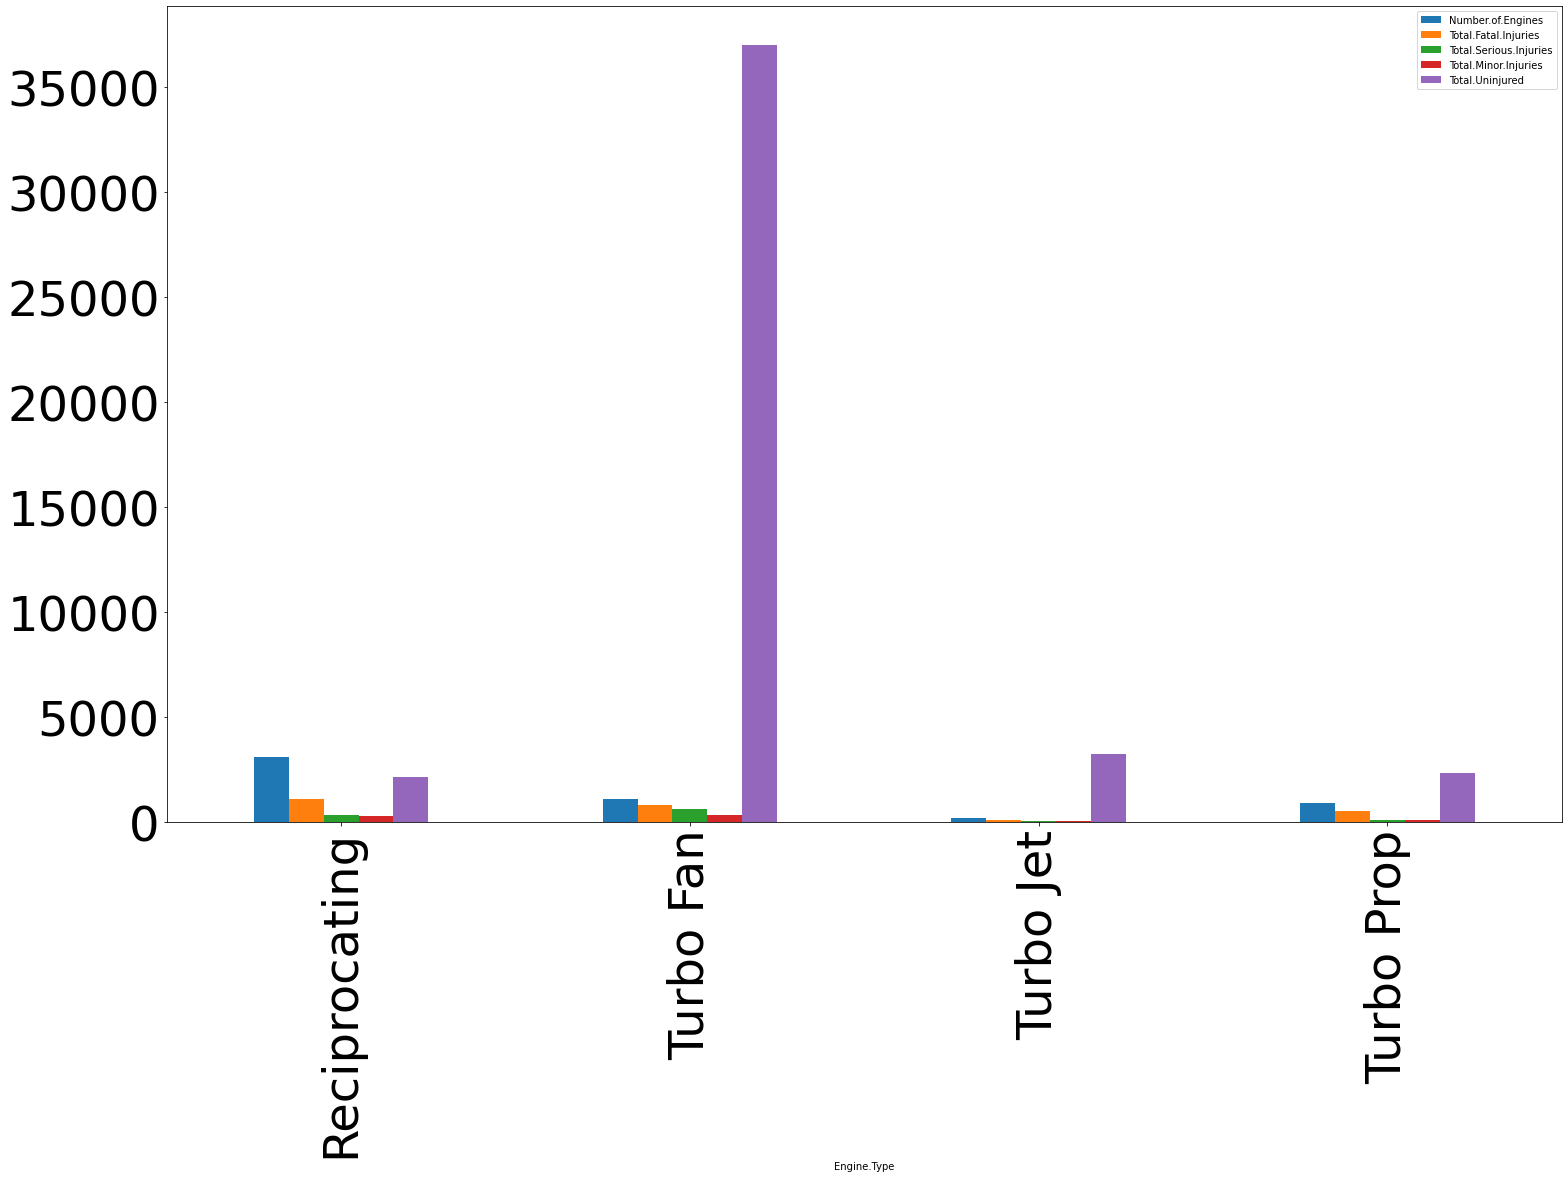

In [65]:
adet = adne[(adne['Engine.Type'] == 'Reciprocating') | (adne['Engine.Type'] == 'Turbo Fan')|(adne['Engine.Type'] == 'Turbo Jet')|(adne['Engine.Type'] == 'Turbo Prop')]
adet.groupby(['Engine.Type']).sum().plot(kind="bar", figsize=(25,15), fontsize=48)

<AxesSubplot:xlabel='Engine.Type'>

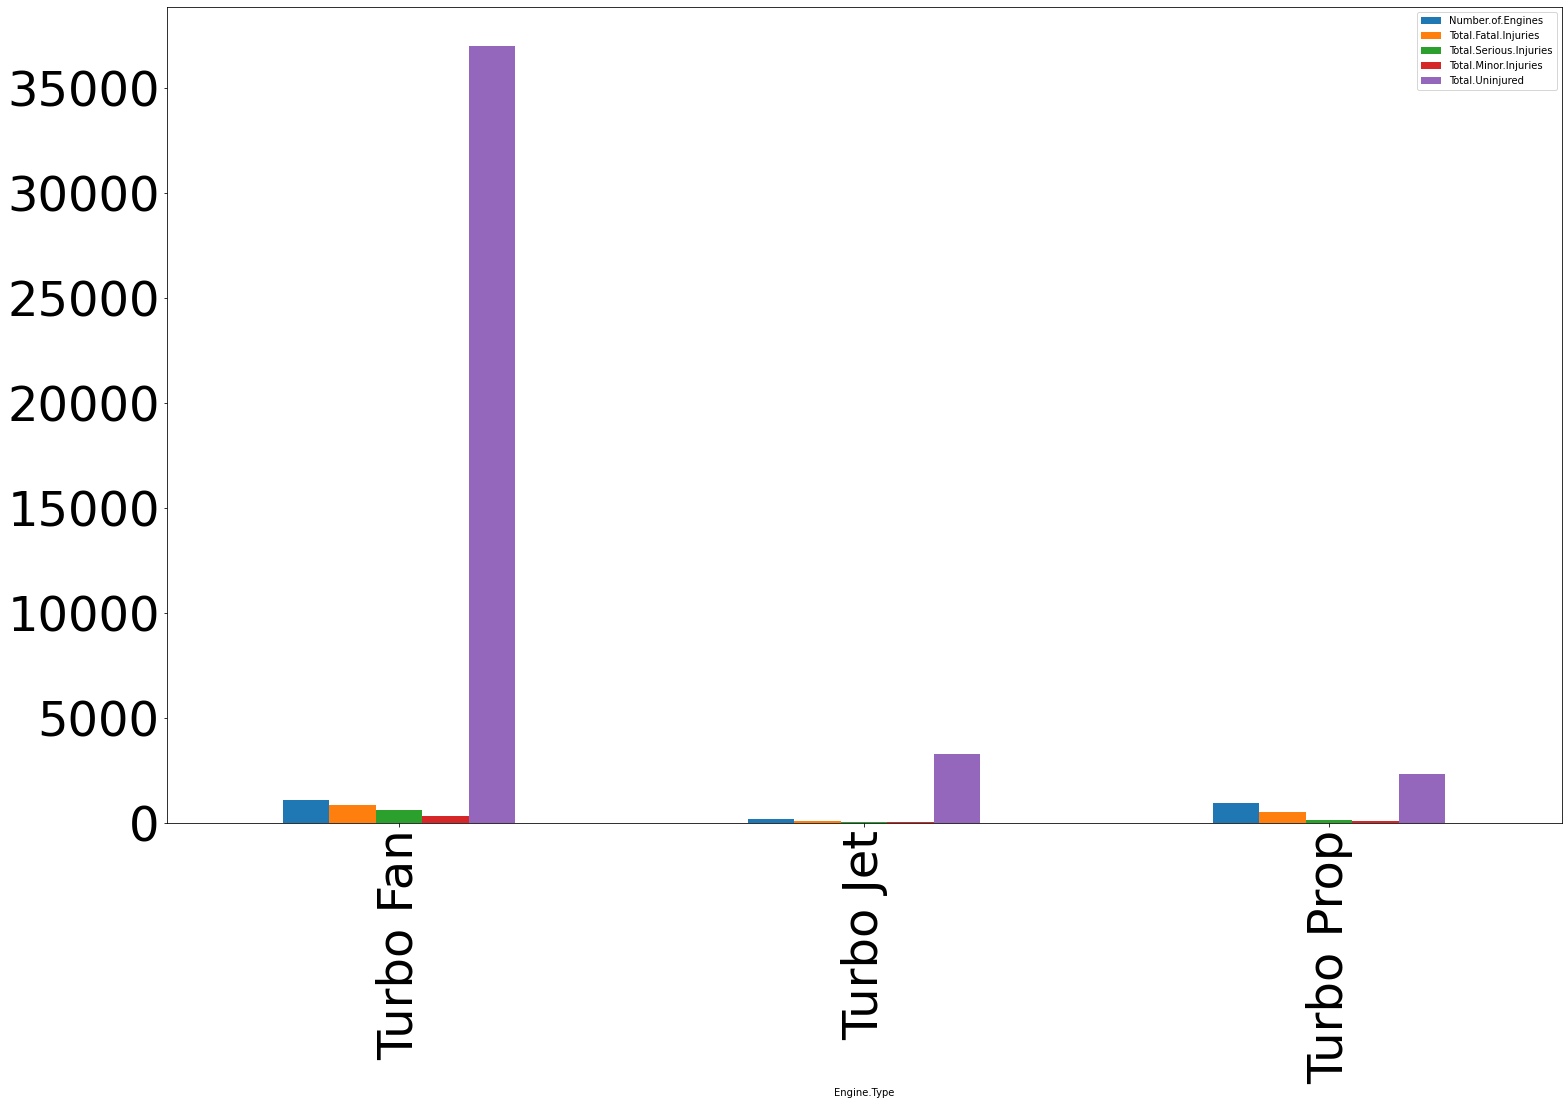

In [66]:
adturbo = adet[adet['Engine.Type'] != 'Reciprocating']
adturbo.groupby(['Engine.Type']).sum().plot(kind="bar", figsize=(25,15), fontsize=48)

#### Injuries by Make

Boeing is the safest of the top airplane producers with 95% of their passengers who are involved in an accident being uninjured versus 70% of the passengers involved in accidents with the other two of the top three airplane producers. 

In [67]:
adturbo[('Make')] = adturbo['Make'].str.capitalize()

In [68]:
adturbo['Make'].value_counts()
###adturbo = adturbo.dropna()

Beech                             173
Boeing                            149
Cessna                            120
Embraer                            47
Airbus                             36
                                 ... 
Fairchild swearingen                1
Potez-air fouga                     1
Bae systems (operations) limit      1
Piper aircraft                      1
Nihon                               1
Name: Make, Length: 108, dtype: int64

In [69]:
ad_top3makes = adturbo[(adturbo['Make'] == 'Beech') | (adturbo['Make'] == 'Boeing')|(adturbo['Make'] == 'Cessna')]
ad_top3makes.drop(columns = ['Number.of.Engines'], inplace=True)
ad_top3makes.groupby(['Make']).sum()
###ad_top3makes.groupby(['Make']).sum().plot(kind="bar", figsize=(25,15), fontsize=48)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
Beech,135.0,35.0,31.0,478.0
Boeing,314.0,441.0,156.0,19903.0
Cessna,87.0,32.0,4.0,298.0


#### Injuries by Boeing Models

In [70]:
adboeing = ad_top3makes[(ad_top3makes['Make'] == 'Boeing')]
adboeing['Model'] = adboeing['Model'].astype(str)
adboeing['Model'].value_counts()

737        17
767         9
747         9
757         6
737 7H4     6
           ..
777-2Q8     1
DC-10       1
757-351     1
737-282     1
757-2Q8     1
Name: Model, Length: 81, dtype: int64

In [71]:
adboeing["Model"] = adboeing["Model"].replace("737 7H4", "737")

In [72]:
adboeing["Model"] = adboeing["Model"].replace("757-222", "757")
adboeing["Model"] = adboeing["Model"].replace("737-7H4", "737")
adboeing["Model"] = adboeing["Model"].replace("737-823", "737")
adboeing["Model"] = adboeing["Model"].replace("727-200", "727")
adboeing["Model"] = adboeing["Model"].replace("737-300", "737")
adboeing["Model"] = adboeing["Model"].replace("737 3H4", "737")
adboeing["Model"] = adboeing["Model"].replace("747-123", "747")


In [73]:
adboeing["Model"] = adboeing["Model"].apply(lambda x: "727" if "727" in x else x)
adboeing["Model"] = adboeing["Model"].apply(lambda x: "737" if "737" in x else x)
adboeing["Model"] = adboeing["Model"].apply(lambda x: "747" if "747" in x else x)
adboeing["Model"] = adboeing["Model"].apply(lambda x: "757" if "757" in x else x)
adboeing["Model"] = adboeing["Model"].apply(lambda x: "767" if "767" in x else x)
adboeing["Model"] = adboeing["Model"].apply(lambda x: "777" if "777" in x else x)

# Conclusions

In [74]:
adboeing['Model'].value_counts()

737          62
767          20
747          19
757          18
727          11
777          10
DC-10         1
DHC-8-102     1
707-123B      1
707-323C      1
717-200       1
MD-10-10F     1
KC-135A       1
MD-11F        1
707-321B      1
Name: Model, dtype: int64

In [75]:
adboeing['Model'].value_counts()

737          62
767          20
747          19
757          18
727          11
777          10
DC-10         1
DHC-8-102     1
707-123B      1
707-323C      1
717-200       1
MD-10-10F     1
KC-135A       1
MD-11F        1
707-321B      1
Name: Model, dtype: int64

In [76]:
admodels = adboeing[(adboeing['Model'] == '737') | (adboeing['Model'] == '767')|(adboeing['Model'] == '747')|(adboeing['Model'] == '757')|(adboeing['Model'] == '727')|(adboeing['Model'] == '777')]

In [77]:
admodels['Model'].value_counts()

737    62
767    20
747    19
757    18
727    11
777    10
Name: Model, dtype: int64

In [80]:
admodels.groupby(['Model']).sum()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Model,,,,
727,0.0,0.0,0.0,745.0
737,2.0,207.0,100.0,7306.0
747,235.0,51.0,3.0,3191.0
757,0.0,0.0,0.0,3072.0
767,68.0,31.0,2.0,2436.0
777,3.0,138.0,50.0,2715.0


<AxesSubplot:xlabel='Model'>

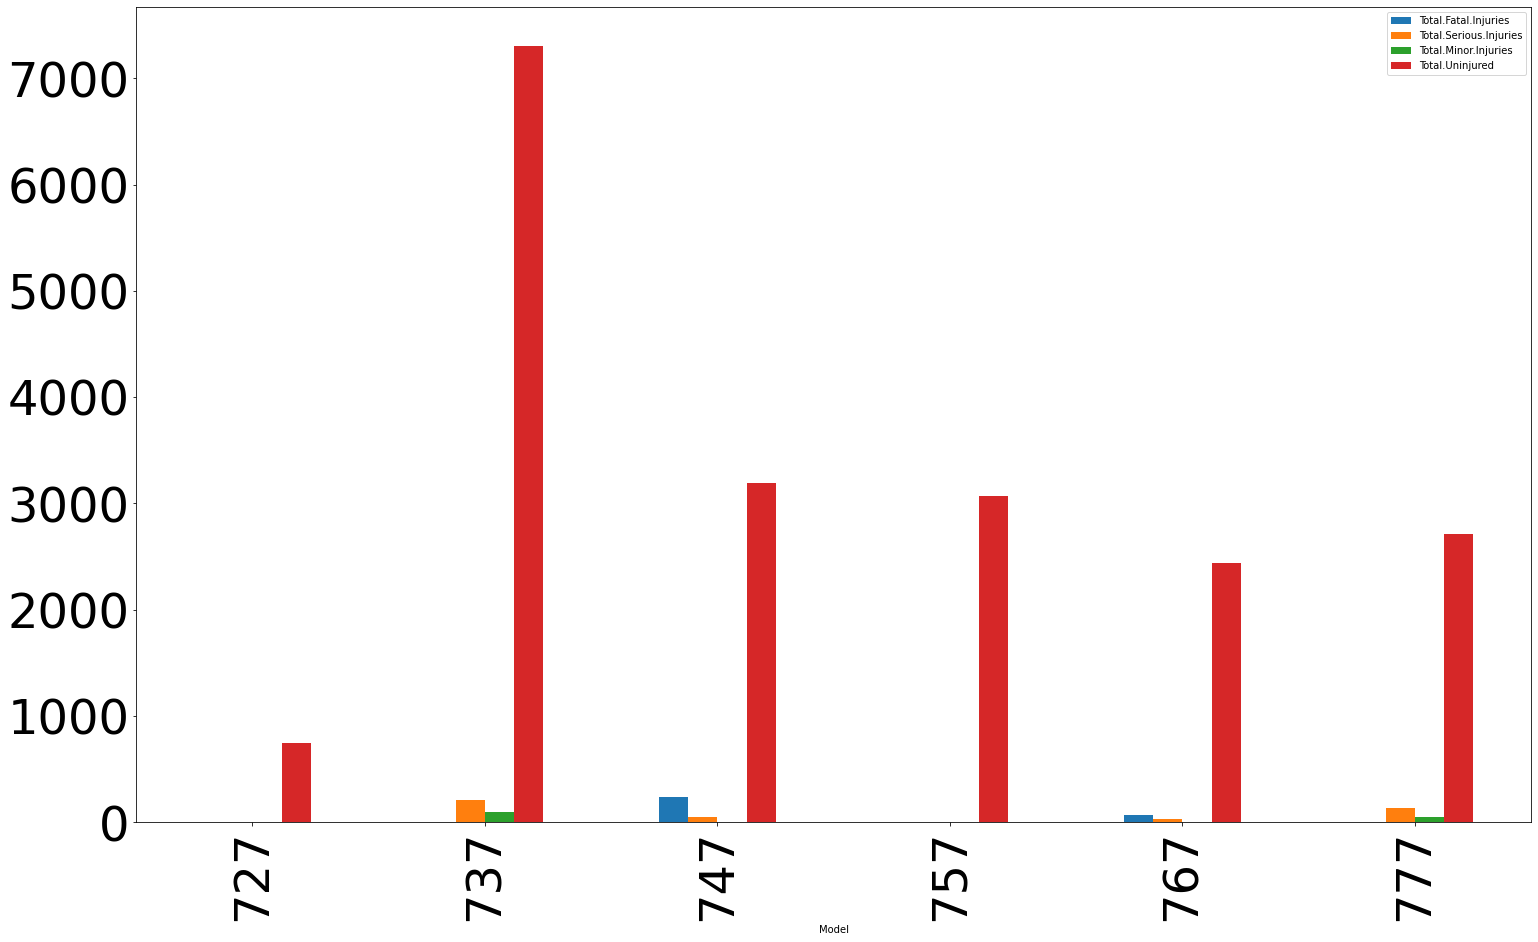

In [79]:
admodels.groupby(['Model']).sum().plot(kind="bar", figsize=(25,15), fontsize=48)

### This analysis leads to three recommendations for least risky aircraft for the company to purchase



#### 1. Turbo engines have the least risk. 

#### 2. Boeing has the least risk. 

#### 3. The 727 and 757 models have the lowest risks.  Every person who has been involved in an accident in one of those airplanes was uninjured. 